In [55]:
pip install split-folders --quiet

Note: you may need to restart the kernel to use updated packages.


> Splitting data

In [56]:
import splitfolders
splitfolders.ratio(r"C:\Users\sn902\Python Programming\Danger Of Extinction",output='Splitted',ratio=(0.8,0.1,0.1))

Copying files: 6483 files [01:21, 79.29 files/s]


> Importing Libraries

In [57]:
!pip install tensorflow

In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import keras.layers as ml

from PIL import Image

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator as Imgen


In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
train_dir = "./Splitted/train"
val_dir = "./Splitted/val"
test_dir = "./Splitted/test"

In [61]:
train_ds = Imgen(rescale=1./255).flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    seed = 1,
                                                     batch_size=32
                                                    )
val_ds = Imgen(rescale=1./255).flow_from_directory(val_dir,
                                                    target_size=(150,150),
                                                    seed = 1,
                                                     batch_size=32
                                                    )
test_ds = Imgen(rescale=1./255).flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    seed = 1,
                                                     batch_size=32
                                                    )

Found 5183 images belonging to 11 classes.
Found 644 images belonging to 11 classes.
Found 656 images belonging to 11 classes.


In [62]:
x_train,y_train = next(train_ds)
labels = train_ds.class_indices
labels

{'African_Elephant': 0,
 'Amur_Leopard': 1,
 'Arctic_Fox': 2,
 'Chimpanzee': 3,
 'Jaguars': 4,
 'Lion': 5,
 'Orangutan': 6,
 'Panda': 7,
 'Panthers': 8,
 'Rhino': 9,
 'cheetahs': 10}

In [63]:
pred_li = list(labels.keys())
pred_li

['African_Elephant',
 'Amur_Leopard',
 'Arctic_Fox',
 'Chimpanzee',
 'Jaguars',
 'Lion',
 'Orangutan',
 'Panda',
 'Panthers',
 'Rhino',
 'cheetahs']

In [64]:
un_labels = train_ds.classes
len(un_labels)

5183

In [65]:
un_animals = pd.DataFrame(un_labels).value_counts()
un_animals

7     676
5     644
9     618
10    472
4     461
8     452
1     424
6     396
0     376
3     369
2     295
dtype: int64

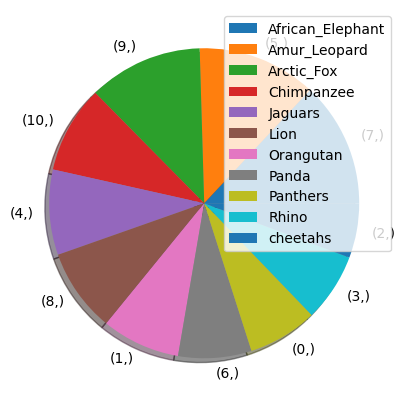

In [66]:
plt.figure(figsize=(5,6))
un_animals.plot(kind='pie',shadow=True)
plt.legend(pred_li,loc ='upper right');

> Images

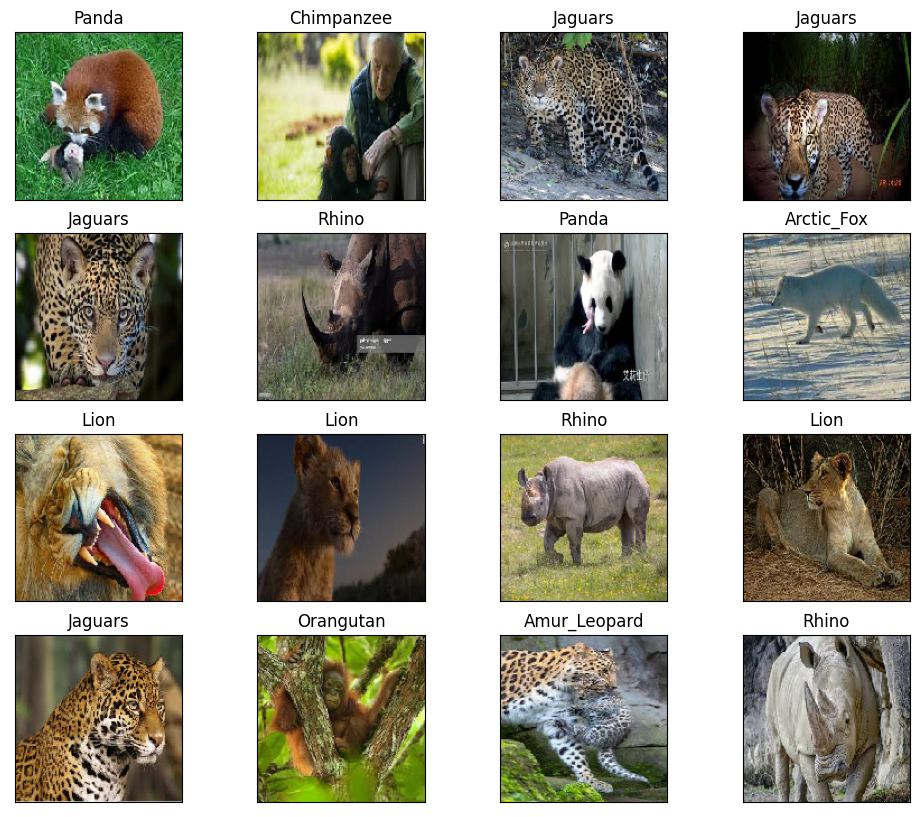

In [67]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(pred_li[np.argmax(y_train[i])])
    

### Trying transfer learning

In [68]:
from keras.applications.xception import Xception

In [69]:
base_model = Xception(include_top=False,
                       weights='imagenet',
                       input_shape=(150,150,3)
                       )
base_model.trainable = False

In [70]:
model = keras.models.Sequential([
    
    #base_model
    base_model,
    
    ml.GlobalAveragePooling2D(),
    
    ml.Dense(128,activation='relu'),
    ml.Dropout(0.5),
    
    ml.Dense(64,activation='relu'),
    ml.Dropout(0.5),
    
    ml.Dense(11,activation='relu')
])

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [72]:
#compile
model.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [73]:
#callbacks
my_calls = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),tf.keras.callbacks.ModelCheckpoint(monitor='val_accuracy',save_best_only=True,mode='max',filepath="./")]

In [ ]:
#train
hist = model.fit(train_ds,epochs=15,validation_data=val_ds,callbacks=my_calls)

Epoch 1/15
162/162 [==============================] - ETA: 0s - loss: 1.2311 - accuracy: 0.5964

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


162/162 [==============================] - 331s 2s/step - loss: 1.2311 - accuracy: 0.5964 - val_loss: 0.4733 - val_accuracy: 0.8571
Epoch 2/15
162/162 [==============================] - ETA: 0s - loss: 0.7069 - accuracy: 0.7721

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


162/162 [==============================] - 304s 2s/step - loss: 0.7069 - accuracy: 0.7721 - val_loss: 0.4251 - val_accuracy: 0.8696
Epoch 3/15
162/162 [==============================] - ETA: 0s - loss: 0.5814 - accuracy: 0.8173

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


162/162 [==============================] - 316s 2s/step - loss: 0.5814 - accuracy: 0.8173 - val_loss: 0.4151 - val_accuracy: 0.8711
Epoch 4/15
162/162 [==============================] - ETA: 0s - loss: 0.5194 - accuracy: 0.8393

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


162/162 [==============================] - 318s 2s/step - loss: 0.5194 - accuracy: 0.8393 - val_loss: 0.4127 - val_accuracy: 0.8742
Epoch 5/15
162/162 [==============================] - 283s 2s/step - loss: 0.4629 - accuracy: 0.8593 - val_loss: 0.4177 - val_accuracy: 0.8742
Epoch 6/15
162/162 [==============================] - ETA: 0s - loss: 0.4437 - accuracy: 0.8682

INFO:tensorflow:Assets written to: .\assets


INFO:tensorflow:Assets written to: .\assets


162/162 [==============================] - 324s 2s/step - loss: 0.4437 - accuracy: 0.8682 - val_loss: 0.3944 - val_accuracy: 0.8960
Epoch 7/15
162/162 [==============================] - 284s 2s/step - loss: 0.3878 - accuracy: 0.8781 - val_loss: 0.3853 - val_accuracy: 0.8882
Epoch 8/15
162/162 [==============================] - 294s 2s/step - loss: 0.3618 - accuracy: 0.8864 - val_loss: 0.3863 - val_accuracy: 0.8804
Epoch 9/15
154/162 [===========================>..] - ETA: 12s - loss: 0.3309 - accuracy: 0.8953

In [ ]:
#test
model.evaluate(test_ds)

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

### Tests

In [ ]:
x_test,y_test = next(test_ds)
print(x_test.shape,y_test.shape)

In [ ]:
pred_test = model.predict(x_test)
pred_test = [np.argmax(i) for i in pred_test]

In [ ]:
pred_li

In [ ]:
plt.figure(figsize=(18,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel("Actual: {}".format(pred_li[np.argmax(y_test[i])]))
    plt.ylabel("Pred: {}".format(pred_li[pred_test[i]]))

In [ ]:
model.save('trained_model.h5')